# Seminar 3: Classification

# Measure quality of a classification model

This notebook explains how to measure quality of a classification machine learning model.
We provide definitions for various quality measures and try to find out if they are suitable or not for a particular machine learning classification problem.

The data is a subsample from the kaggle comptetion "Give me some credit"
https://www.kaggle.com/c/GiveMeSomeCredit#description

In [ ]:
# Imports

# data processing tools: pandas and numpy
import numpy as np
import pandas as pd

# visualization tools: matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning tools: various methods from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import f1_score, accuracy_score, average_precision_score

# Load data

Below is a short introduction to `pandas.DataFrame` syntax and capabilities

In [ ]:
# load the data
training_data = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/credit/training_data.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/credit/test_data.csv')

In [ ]:
training_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0.153128,32,1,0.082167,5500.0,6,0,0,0,3.0
4997,0,0.413590,55,0,1.205276,1212.0,9,0,1,0,0.0
4998,0,0.273258,44,0,3.762905,1142.0,5,0,2,0,2.0
4999,0,0.100264,43,0,0.458429,3908.0,23,0,0,0,0.0


See some technical info about data

In [ ]:
# print information about the data
training_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      5001 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  5001 non-null   float64
 2   age                                   5001 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  5001 non-null   int64  
 4   DebtRatio                             5001 non-null   float64
 5   MonthlyIncome                         4031 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       5001 non-null   int64  
 7   NumberOfTimes90DaysLate               5001 non-null   int64  
 8   NumberRealEstateLoansOrLines          5001 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  5001 non-null   int64  
 10  NumberOfDependents                    4859 non-null   float64
dtypes: float64(4), in

Let's look at some general statistics of data:
* **count** -- number of not `NaN` values;
* **mean**, **std** -- mean and standard deviation;
* other -- minimal, maximal values, quantiles.

In [ ]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,5001.0,0.060988,0.239332,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,5001.0,3.842957,117.415101,0.0,0.030053,0.163463,0.556134,6324.0
age,5001.0,52.128374,14.907257,21.0,41.000000,52.000000,63.000000,99.0
NumberOfTime30-59DaysPastDueNotWorse,5001.0,0.355729,3.178306,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,5001.0,368.032252,2593.676885,0.0,0.177007,0.365727,0.829553,168835.0
MonthlyIncome,4031.0,6554.690151,7058.453424,0.0,3454.500000,5333.000000,8167.500000,208333.0
NumberOfOpenCreditLinesAndLoans,5001.0,8.383323,5.111950,0.0,5.000000,8.000000,11.000000,46.0
NumberOfTimes90DaysLate,5001.0,0.194361,3.132956,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,5001.0,1.022795,1.107556,0.0,0.000000,1.000000,2.000000,17.0
NumberOfTime60-89DaysPastDueNotWorse,5001.0,0.165167,3.111899,0.0,0.000000,0.000000,0.000000,98.0


Choose randomly ten objects from dataset:

In [ ]:
training_data.sample(10, random_state=123)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2648,0,0.000000,57,0,0.000000,8500.0,3,0,0,0,3.0
2456,0,0.265081,32,0,0.207063,6200.0,6,0,0,0,3.0
4558,0,0.067098,34,0,0.280673,8500.0,7,0,2,0,2.0
4885,0,1.123876,26,1,0.356159,2540.0,5,3,0,3,2.0
92,0,0.784836,52,0,2662.000000,NaN,10,0,2,1,0.0
3602,0,0.004000,70,0,0.169479,8000.0,8,0,1,0,1.0
30,0,0.704074,28,1,0.155201,4200.0,8,0,0,0,0.0
1746,0,0.142398,57,0,0.264080,4225.0,6,0,1,0,0.0
1692,0,0.016862,48,0,0.425822,12260.0,12,0,5,0,4.0
2277,1,0.935497,55,0,0.450293,6477.0,10,0,2,0,0.0


We see that there are `NaN`s in data. Let's calculate mean values of features on **training data** and fill them in instead of the missing values. We will do that both for **train** and **test**.

There are several ways to fill in skipped data:
* mean, median;
* regression predictions;
* in case of time series -- last known value,
* linear interpolation, etc.

If the number of skipped values is small, you can throw the corresponding objects away.

In [ ]:
train_mean = training_data.mean()
train_mean

,0
SeriousDlqin2yrs,0.060988
RevolvingUtilizationOfUnsecuredLines,3.842957
age,52.128374
NumberOfTime30-59DaysPastDueNotWorse,0.355729
DebtRatio,368.032252
MonthlyIncome,6554.690151
NumberOfOpenCreditLinesAndLoans,8.383323
NumberOfTimes90DaysLate,0.194361
NumberRealEstateLoansOrLines,1.022795
NumberOfTime60-89DaysPastDueNotWorse,0.165167


In [ ]:
# fill NA values with mean training values
training_data.fillna(train_mean, inplace=True)
test_data.fillna(train_mean, inplace=True)

print(training_data.isnull().sum())
print('well done!\n')
# below is a popular syntax for multi-line function calls
# typically used when chaining methods when processing dataframes
print(
(
    test_data
    .isnull()
    .sum()
))
print('well done!')

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
well done!

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
well done!


Compare train and test distributions

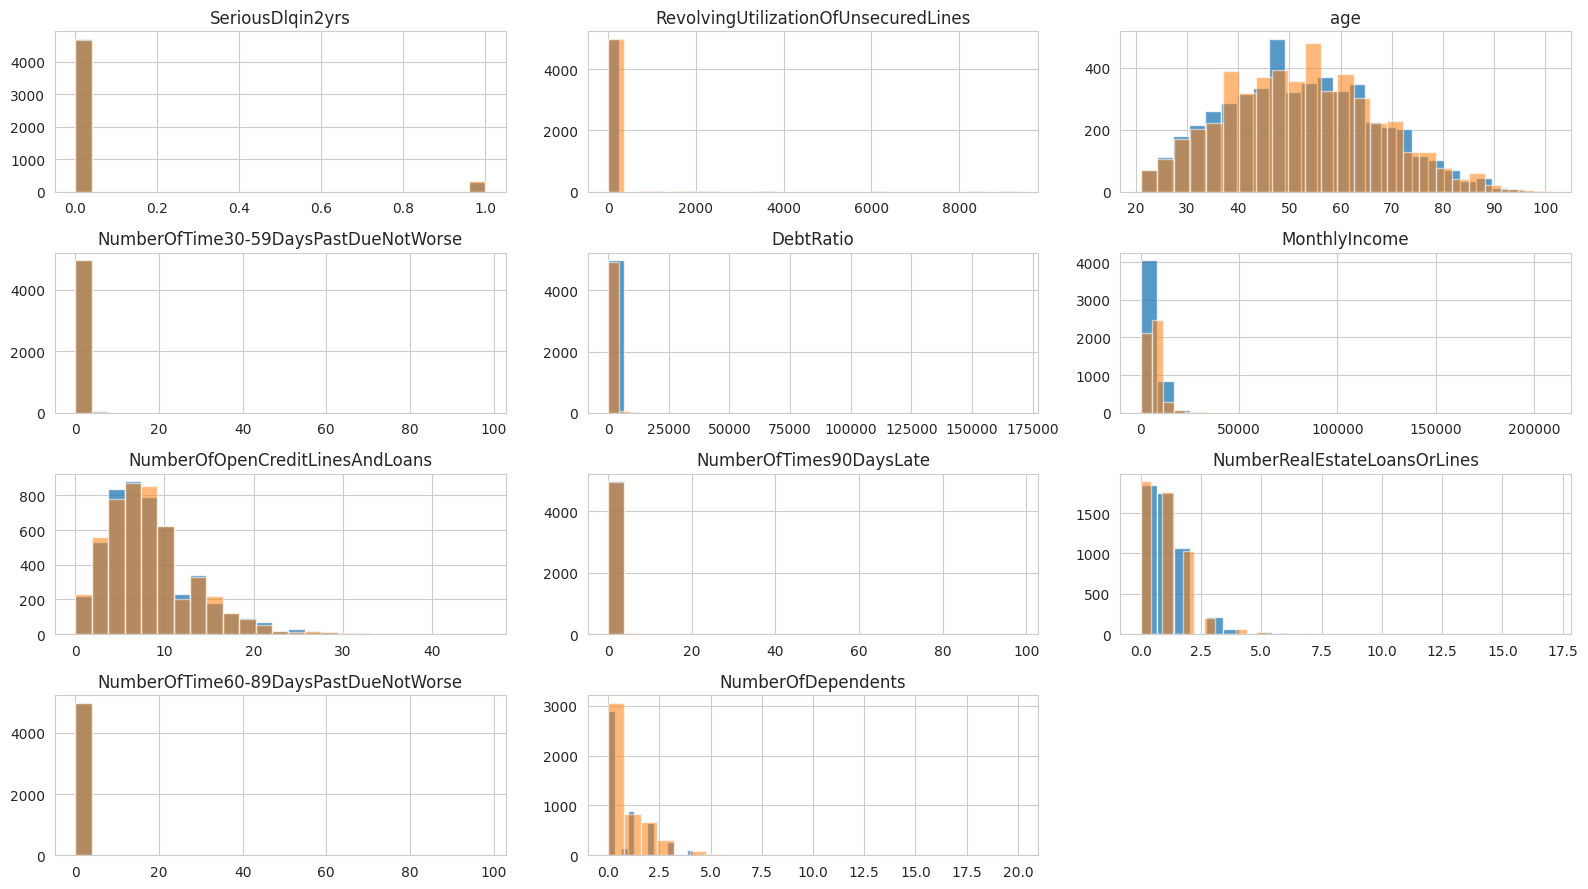

In [ ]:
axes = training_data.hist(figsize=(16, 9), bins=25, alpha=0.75) # that will plot training data histograms

for plot in axes.flat: # that will draw test data on top of training histograms
    column = plot.title.get_text()
    if column:
        test_data[plot.title.get_text()].hist(ax=plot, bins=25, alpha=0.55)

plt.tight_layout()

Pay attention to **SeriousDlqin2yrs** -- 90 days past due delinquency or worse in the last 2 years. We see that most of the borrowers pay in time.

In [ ]:
# The data set is imbalanced: typically people return credits
training_data["SeriousDlqin2yrs"].value_counts().reset_index()

,SeriousDlqin2yrs,count
0,0,4696
1,1,305


# Classification algorithms

First of all, load data for learning as pairs $(X, y)$, where $X = (x_i)_{i=1}^n$ -- input features,
and $y=(y_i)_{i=1}^n$ corresponding labels.

In [ ]:
training_X = training_data.drop("SeriousDlqin2yrs", axis=1)
training_y = training_data["SeriousDlqin2yrs"]

test_X = test_data.drop("SeriousDlqin2yrs", axis=1)
test_y = test_data["SeriousDlqin2yrs"]

Construct calssification algorithms and train them.

In [ ]:
# Construct Decision Tree model

decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(training_X, training_y)

DecisionTreeClassifier(max_depth=5)

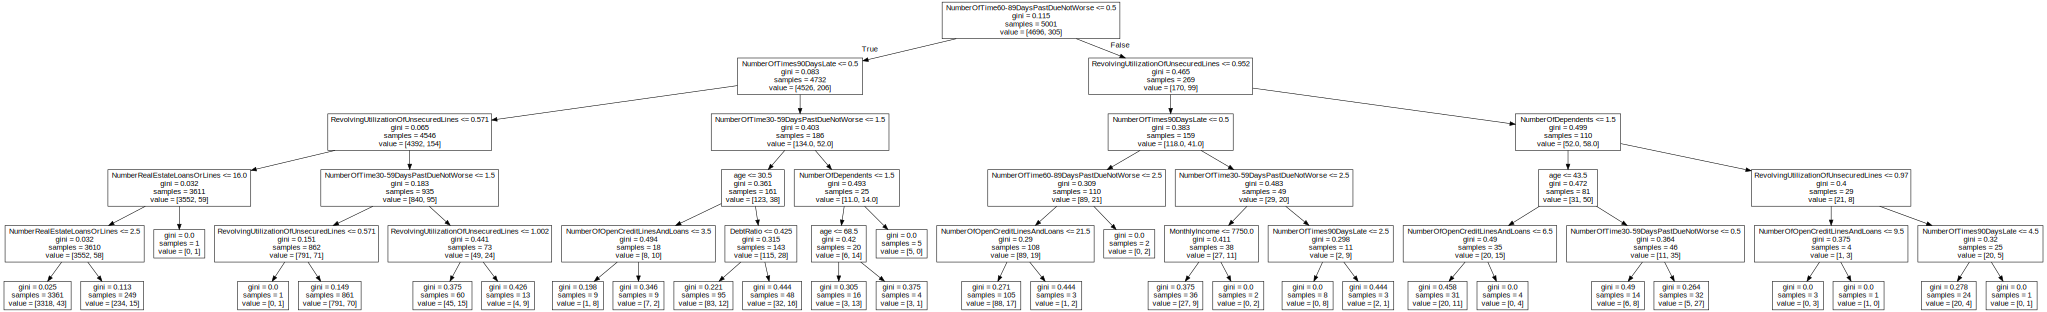

In [ ]:
# https://alexanderdyakonov.wordpress.com/2015/12/15/%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%8C%D1%82%D0%B5%D1%81%D1%8C-%D0%B4%D0%B6%D0%B8%D0%BD%D0%B8/
!pip install graphviz
from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(decision_tree, out_file=None, feature_names=training_X.columns))

P.S. Gini impurity: https://alexanderdyakonov.wordpress.com/2015/12/15/знакомьтесь-джини/

In [ ]:
# Construct k Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(training_X, training_y)

KNeighborsClassifier()

In [ ]:
print("Training accuracy:")
print("\tDT accuracy:\t%.2f%%" % (100 * decision_tree.score(training_X, training_y)))
print("\tkNN accuracy:\t%.2f%%" % (100 * knn.score(training_X, training_y)))
print("\tNumber of '0' labels:\t%.2f%%" % (100 - 100 * np.mean(training_y)))
print()

print("Test accuracy:")
print("\tDT accuarcy:\t%.2f%%" % (100 * decision_tree.score(test_X, test_y)))
print("\tkNN accuarcy:\t%.2f%%" % (100 * knn.score(test_X, test_y)))
print("\tNumber of '0' labels:\t%.2f%%" % (100 - 100 * np.mean(test_y)))

Training accuracy:
	DT accuracy:	95.28%
	kNN accuracy:	94.10%
	Number of '0' labels:	93.90%

Test accuracy:
	DT accuarcy:	92.94%
	kNN accuarcy:	93.08%
	Number of '0' labels:	93.30%


**Question:** We got accuracy about $95\%$. Is it good or bad?

**Question:** Which method (DT/kNN) is better?

**Note**: Classification methods typically predict the probability of a classified item belonging to each class.

$$
[p_1, p_2, \dots, p_K] = f_c(x),
$$

where $p_k \geq 0; \sum p_k = 1$

- how these probabilites are obtained depends on the particular classification method.

**Question**: Think: how to obtain probabilites in case of decision trees?

In [ ]:
test_probabilities_dt = decision_tree.predict_proba(test_X)
print(test_probabilities_dt)

[[0.98720619 0.01279381]
 [0.91869919 0.08130081]
 [0.91869919 0.08130081]
 ...
 [0.98720619 0.01279381]
 [0.98720619 0.01279381]
 [0.98720619 0.01279381]]


# Classification quality measures

## Confusion matrix

Confusion matrix is table layout that allows visualization of the performance of an algorithm. Rows of this matrix correspond to actual classes of the test set, columns correspond to predicted labels. There are 4 types of elements if predictions are given:
* True Positive
* False Negative
* False Positive
* True Negative

| Variable | Predicted Negative | Predicted Positive |
| ------------- |-------------|-----|
| Actual Negative  | TN | FP |
| Actual Positive | FN | TP |


In [ ]:
test_predictions_dt = decision_tree.predict(test_X)
training_predictions_dt = decision_tree.predict(training_X)
confusion_dt = pd.DataFrame(confusion_matrix(test_y, test_predictions_dt))

print('Confusion for Decision Tree:')
confusion_dt

Confusion for Decision Tree:


,0,1
0,4606,60
1,293,42


In [ ]:
test_predictions_knn = knn.predict(test_X)
training_predictions_knn = knn.predict(training_X)
confusion_knn = pd.DataFrame(confusion_matrix(test_y, test_predictions_knn))
print('Confusion for kNN:')
confusion_knn

Confusion for kNN:


,0,1
0,4651,15
1,331,4


**Question (repeat):** We got accuracy about $95\%$. Is it good or bad?

If we want to compare metrics on different data, we can use instead True Positive Rate and False Positive Rate:
* False Positive Rate is $\frac{FP}{FP + TN}$
* True  Positive Rate is $\frac{TP}{TP + FN}$

**Question:** Compute `FPR` and `TPR` for DT/KNN. Wheter they are good or bad?

## ROC curve

Consider $2$-classes classification (it is our case)

**Remember**: Typically, classifiers produce not just an answer ($0$ class or $1$ class), but **"probabilites"**, i.e.:

$$
[p_0, p_1] = f_c(x), p_0 + p_1 = 1
$$

where $f_c(x)[1] \in [0, 1]$. To predict the **class** ($0$/$1$) one can choose a threshold $\tau$:

$$ \text{Classifier}\bigl(x\bigr)
    = \begin{cases}
    1 & \text{if}\, f_c[1](x) \geq \tau\,,\\
    0 & \text{else}\,.
    \end{cases}
$$

* **ROC** stands for __*Receiver Operating Characteristic*__. This curve shows True Positive Rate (**TPR**) against False Positive Rate (**FPR**) as classifier's discrimination threshold is varied
    
* **roc_curve** function from *scikit-learn* allows to easily obtain ROC curve points and **threshold** values.

**Note**: To build ROC-curve we only need :
 - the probabilities outputted by $f_c$ (for each input object)
 - true classes (for each input object)
 - the model $f_c$ itself is *not needed*

Detailed description of ROC-AUC by Alexander Dyakonov (in Russian)
https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/

In [ ]:
# that will give us probabilities of class '1' (it is our RARE class) for each test observation

test_probabilities_dt = decision_tree.predict_proba(test_X)[:, 1]
training_probabilities_dt = decision_tree.predict_proba(training_X)[:, 1]
test_probabilities_knn = knn.predict_proba(test_X)[:, 1]
training_probabilities_knn = knn.predict_proba(training_X)[:, 1]

In [ ]:
false_positive_rates_dt, true_positive_rates_dt, threshold_dt = roc_curve(test_y, test_probabilities_dt)
false_positive_rates_knn, true_positive_rates_knn, threshold_knn = roc_curve(test_y, test_probabilities_knn)

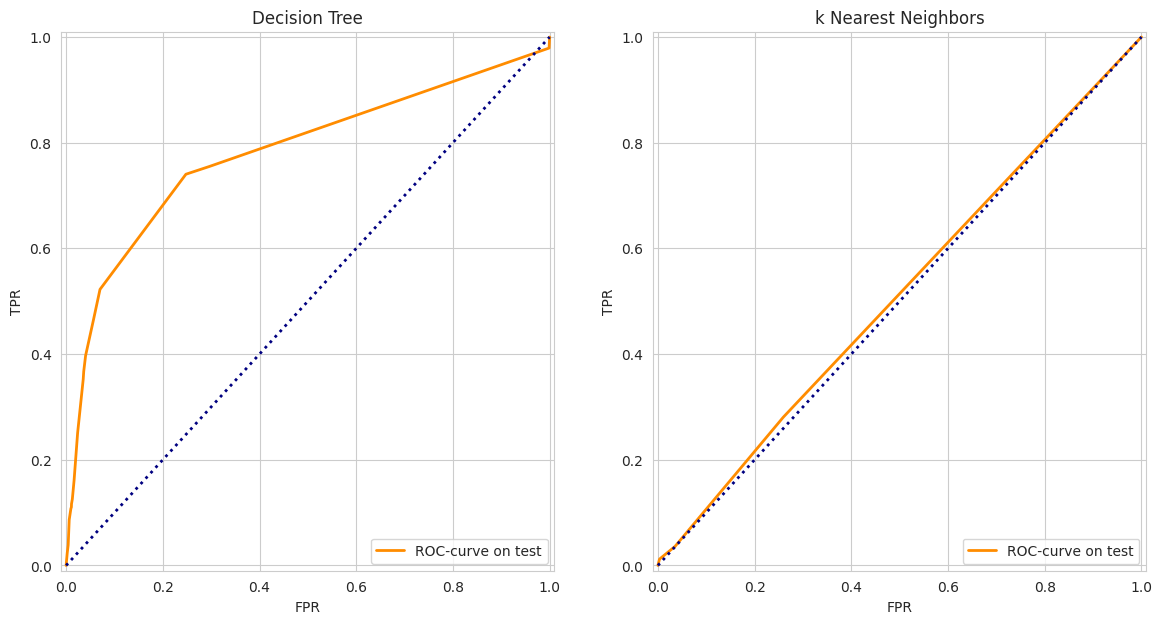

In [ ]:
# create plot
fig = plt.figure(figsize=(14, 7))

# specify parameters for the first curve
plot_1 = fig.add_subplot(121,
                       xlabel="FPR", xlim=(-.01, 1.01),
                       ylabel="TPR", ylim=(-.01, 1.01), title = 'Decision Tree')

# draw the first curve
plot_1.plot(false_positive_rates_dt, true_positive_rates_dt,
          color='darkorange', lw=2, label = 'ROC-curve on test')
plot_1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.legend(loc="lower right")

# specify parameters for the second curve
plot_2 = fig.add_subplot(122,
                       xlabel="FPR", xlim=(-.01, 1.01),
                       ylabel="TPR", ylim=(-.01, 1.01), title = 'k Nearest Neighbors')

# draw the second curve
plot_2.plot(false_positive_rates_knn, true_positive_rates_knn,
          color='darkorange', lw=2, label = 'ROC-curve on test')
plot_2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.legend(loc="lower right")

plt.show()

**Question:** If we randomly assign probabilities to (test) objects, what would be
- accuracy?
- ROC-curve?

The closer **ROC** curve to the **upper left** corner, the better classification is.

Despite being a good visual representation we usually need a number to make conclusions about calssification quality. In case of ROC curve this number is Area Under the Curve (**ROC-AUC**).

*scikit-learn* has a special function **auc(...)**:

In [ ]:
roc_auc_dt = auc(false_positive_rates_dt, true_positive_rates_dt)
roc_auc_knn = auc(false_positive_rates_knn, true_positive_rates_knn)

print("DT ROC-AUC on test data:", roc_auc_dt)
print("kNN ROC-AUC on test data:", roc_auc_knn)

DT ROC-AUC on test data: 0.7806977755884102
kNN ROC-AUC on test data: 0.5105027797147994


For the training set ROC curve and ROC-AUC look much better.

In [ ]:
training_false_positive_rates_dt, training_true_positive_rates_dt, _ = roc_curve(training_y, training_probabilities_dt)
training_false_positive_rates_knn, training_true_positive_rates_knn, _ = roc_curve(training_y, training_probabilities_knn)

training_roc_auc_dt = auc(training_false_positive_rates_dt, training_true_positive_rates_dt)
training_roc_auc_knn = auc(training_false_positive_rates_knn, training_true_positive_rates_knn)

print("DT ROC-AUC on training data:", training_roc_auc_dt)
print("kNN ROC-AUC on training data:", training_roc_auc_knn)

DT ROC-AUC on training data: 0.8505512190353841
kNN ROC-AUC on training data: 0.9093846873516351


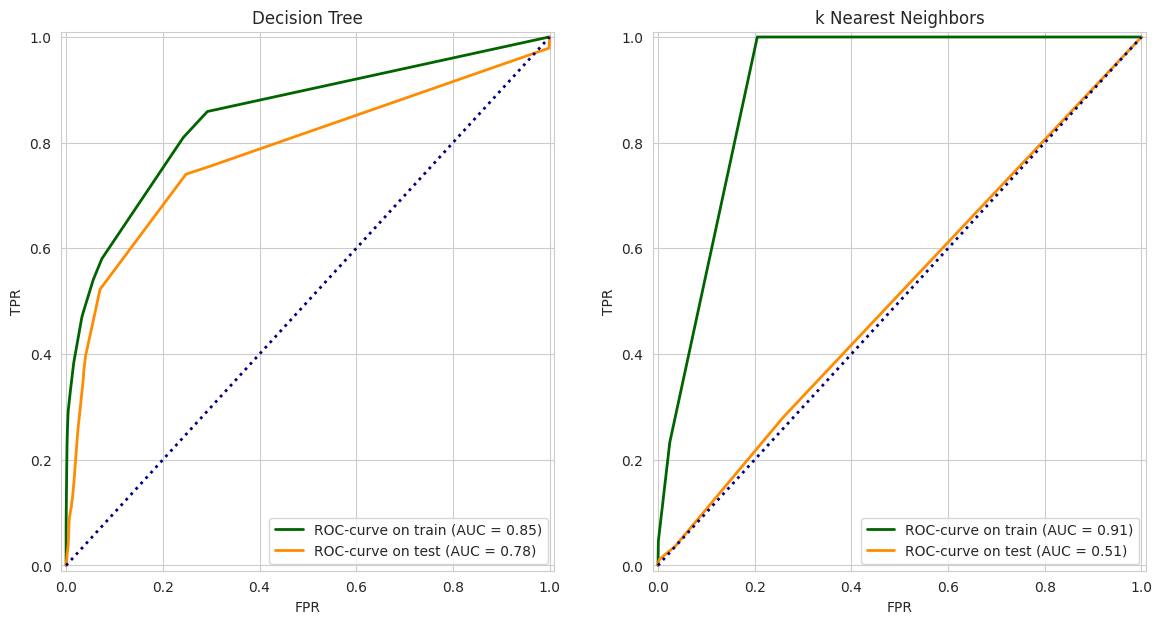

In [ ]:
fig = plt.figure(figsize=(14, 7))

plot_1 = fig.add_subplot(121,
                       xlabel="FPR", xlim=(-.01, 1.01),
                       ylabel="TPR", ylim=(-.01, 1.01), title = 'Decision Tree')

# draw the first curve
plot_1.plot(training_false_positive_rates_dt, training_true_positive_rates_dt,
          color='darkgreen', lw=2, label = 'ROC-curve on train (AUC = %0.2f)' % training_roc_auc_dt)
plot_1.plot(false_positive_rates_dt, true_positive_rates_dt,
          color='darkorange', lw=2, label = 'ROC-curve on test (AUC = %0.2f)' % roc_auc_dt)
plot_1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.legend(loc="lower right")

# specify parameters for the second curve
plot_2 = fig.add_subplot(122,
                       xlabel="FPR", xlim=(-.01, 1.01),
                       ylabel="TPR", ylim=(-.01, 1.01), title = 'k Nearest Neighbors')

# draw the second curve
plot_2.plot(training_false_positive_rates_knn, training_true_positive_rates_knn,
          color='darkgreen', lw=2, label = 'ROC-curve on train (AUC = %0.2f)' % training_roc_auc_knn)
plot_2.plot(false_positive_rates_knn, true_positive_rates_knn,
          color='darkorange', lw=2, label = 'ROC-curve on test (AUC = %0.2f)' % roc_auc_knn)
plot_2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':')
plt.legend(loc="lower right")

plt.show()

Another ROC-AUC visualization http://www.navan.name/roc/

Area under ROC-curve = probability of pairs of objects from different classes being classified correctly.

![alt text](https://alexanderdyakonov.files.wordpress.com/2017/07/eq.png)

$a_i$ - prediction (probability) at $i$-th object, $y_i$ - target (class), $q$- number of objects in test

## Precision and Recall

Precision and Recall are two other measures for evaluation of classification quality. Both of the metrics are calculated based on **confusion matrix**.

<img src="https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/figures/precision_recall.png">

Note that Recall equals to True Positive Rate.

Although "accuracy" and "precision" have very similar meanings, they are completely different metrics. Look how Precision and Recall are evaluated for k Nearest Neighbors classifier:

In [ ]:
confusion = confusion_matrix(test_y, test_predictions_dt)

In [ ]:
TN, FP = confusion[0, 0], confusion[0, 1]
FN, TP = confusion[1, 0], confusion[1, 1]

**Recall** of a classifier is equal to True Positive Rate **TPR** ($\frac{TP}{TP + FN}$). This value may be interpreted as a sensitivity of a classifier to the objects with label `1`. If it is close to $100\%$, then a classifier rarely "miss" the object of class `1`.

In [ ]:
recall = TP / (TP + FN)

print("Recall: %.2f%%" % (100 * recall))

Recall: 12.54%


**Precision** -- is a fraction $\frac{TP}{TP + FP}$. If this value is large, then a classifier assigns label `1` to objects with actual label `0` rarely.

See how it is different to Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

In [ ]:
precision = TP / (TP + FP)

print("Precision: %.2f%%" % (100 * precision))

Precision: 41.18%


A classifier with large Recall but small Precision produces many false positive predictions and tends to assign many `1` labels.

Vice versa, if a classifier has small Recall but large Precision, then it detects class `1` accurately, but misses many objects (many false negative predictions).

**Conclusion**: Both situations (Recall is small and Percision is small) are **bad**.

### Precision-Recall curve

In **precision-recall** space we may construct a curve similar to **ROC** curve in **FPR-TPR** space. PR curve also depicts the dependecy of Precision and Recall on threshold. *scikit* has the corresponding function: **precision_recall_curve(...)**.

Let's calculate PR curve points.

Note that unlike ROC curve, we cannot use interpolation for calculation of area under the curve. This may lead to larger values of the metric, which is not good. In this case we need to use **average_precision_score()** function instead of **auc()** function.

In [ ]:
# generate values for Precision-Recall curve
precision_dt, recall_dt, _ = precision_recall_curve(test_y, test_probabilities_dt)
precision_knn, recall_knn, _ = precision_recall_curve(test_y, test_probabilities_knn)

# calculate value under Precision-Recall curve
pr_auc_dt = average_precision_score(test_y, test_probabilities_dt)
pr_auc_knn = average_precision_score(test_y, test_probabilities_knn)

print("DT PR-AUC on test data:", pr_auc_dt)
print("kNN PR-AUC on test data:", pr_auc_knn)

DT PR-AUC on test data: 0.2725057013539968
kNN PR-AUC on test data: 0.06997723581835391


In [ ]:
# generate values for training Precision Recall curve
training_precision_dt, training_recall_dt, _ = precision_recall_curve(training_y, training_probabilities_dt)
training_precision_knn, training_recall_knn, _ = precision_recall_curve(training_y, training_probabilities_knn)

# TODO calculate value under precision-recall curve
training_pr_auc_dt = average_precision_score(training_y, training_probabilities_dt)
training_pr_auc_knn = average_precision_score(training_y, training_probabilities_knn)

print("DT PR-AUC on training data:", training_pr_auc_dt)
print("kNN PR-AUC on training data:", training_pr_auc_knn)

DT PR-AUC on training data: 0.46891401493347407
kNN PR-AUC on training data: 0.291291159995799


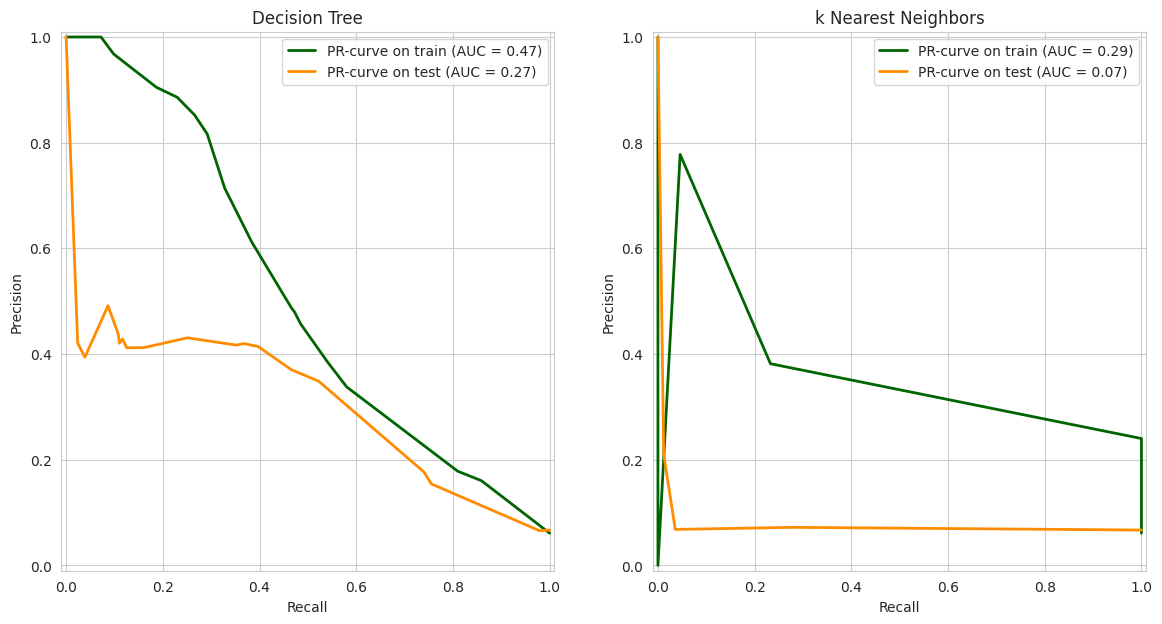

In [ ]:
fig = plt.figure(figsize=(14, 7))

plot_1 = fig.add_subplot(121,
                       xlabel="Recall", xlim=(-.01, 1.01),
                       ylabel="Precision", ylim=(-.01, 1.01), title = 'Decision Tree')

plot_1.plot(training_recall_dt, training_precision_dt,
          color='darkgreen', lw=2, label = 'PR-curve on train (AUC = %0.2f)' % training_pr_auc_dt)
plot_1.plot(recall_dt, precision_dt,
          color='darkorange', lw=2, label = 'PR-curve on test (AUC = %0.2f)' % pr_auc_dt)
plt.legend(loc="upper right")


plot_2 = fig.add_subplot(122,
                       xlabel="Recall", xlim=(-.01, 1.01),
                       ylabel="Precision", ylim=(-.01, 1.01), title = 'k Nearest Neighbors')

plot_2.plot(training_recall_knn, training_precision_knn,
          color='darkgreen', lw=2, label = 'PR-curve on train (AUC = %0.2f)' % training_pr_auc_knn)
plot_2.plot(recall_knn, precision_knn,
          color='darkorange', lw=2, label = 'PR-curve on test (AUC = %0.2f)' % pr_auc_knn)
plt.legend(loc="upper right")

plt.show()

The closer **PR** curve to the **upper right** corner, the better classification is.

Large AUC value means that Precision and Recall are also large. That means that classifier makes small number of both False Positives and False Negatives.

## F1 score

This metric allows to take into account a different cost for False Positive Errors and False Negative Errors.

General $F_\beta$ score is defined as follows:
$$
F_\beta = (1 + \beta^2) \frac{Precision \cdot Recall}{\beta^2 Precision + Recall} = \frac{1 + \beta^2}{\frac{\beta^2}{Recall} + \frac{1}{Precision}}= \frac{\beta + \beta^{-1}}{\beta\frac{1}{\text{Recall}} + \beta^{-1}\frac{1}{\text{Precision}}}
    \,.
$$

Most commonly used is $F_1$ score:
$$
F_1 = 2 \frac{Precision \cdot Recall}{Precision + Recall}
$$

Harmonic mean is used in order to make metric value very small when Precision or Recall is close to zero. Note that $F_1$ score doesn't describe how classifier works for True Negative results (**TN**).

In [ ]:
print("DT F1 score on training data", f1_score(training_y, training_predictions_dt))
print("kNN F1 score on training data", f1_score(training_y, training_predictions_knn))

print("DT F1 score on test data", f1_score(test_y, test_predictions_dt))
print("kNN F1 score on test data", f1_score(test_y, test_predictions_knn))

DT F1 score on training data 0.42995169082125606
kNN F1 score on training data 0.08668730650154799
DT F1 score on test data 0.19221967963386727
kNN F1 score on test data 0.022598870056497175


$F_1$ score is good for imbalanced classification, when a number of class `0` objects is **much** bigger than class `1` objects.

Let's compare **accuracy** and $F_1$ score of our classifiers with *random* classifier, which works as follows:

* estimate probability $\hat{p}$ of class `1` on training data (frequency of class `1` objects);
* for every test object predict randomly:
    * label `1` with probability $\hat{p}$,
    * label `0` with probability $1 - \hat{p}$.

In [ ]:
training_prob = sum(training_y) / len(training_y)
random_predictions = np.random.binomial(1, training_prob, len(test_y))

In [ ]:
print("Decision Tree accuracy\t\t", accuracy_score(test_y, test_predictions_dt))
print("kNN accuracy\t\t\t", accuracy_score(test_y, test_predictions_knn))
print("Random classifier accuracy\t", accuracy_score(test_y, random_predictions))
print('---')
print("Decision Tree F1 score\t\t", f1_score(test_y, test_predictions_dt))
print("kNN F1 score\t\t\t", f1_score(test_y, test_predictions_knn))
print("Random classifier F1 score\t", f1_score(test_y, random_predictions))

Decision Tree accuracy		 0.9294141171765646
kNN accuracy			 0.9308138372325535
Random classifier accuracy	 0.8838232353529294
---
Decision Tree F1 score		 0.19221967963386727
kNN F1 score			 0.022598870056497175
Random classifier F1 score	 0.0733652312599681


# Exercise 1

We have seen how some of classifiers work for this dataset. Now, try it yourself with Logistic Regression.

* Fisrt, **import** **LogisticRegression()** function and train it on training data.
* Then, calculate **ROC AUC**, **PR AUC** and **F1 score** on test data.
* Try to change parameters to improve results.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(penalty = 'l2', C = 100.0, max_iter = 1000)
logistic_regression.fit(training_X, training_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0, max_iter=1000)

In [ ]:
test_predictions = logistic_regression.predict(test_X)
test_probabilities = logistic_regression.predict_proba(test_X)[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(test_y, test_probabilities)
roc_auc = auc(false_positive_rates, true_positive_rates)

In [ ]:
print(roc_auc)

0.6921022832686119


In [ ]:
precision, recall, _ = precision_recall_curve(test_y, test_probabilities)
pr_auc = average_precision_score(test_y, test_probabilities)

In [ ]:
print(pr_auc)

0.21417546888391717


In [ ]:
print(f1_score(test_y, test_predictions))

0.05128205128205128


# Cross-validation technique

In many cases test sample is not available or we have a small dataset, and we have only one sample: a training one. The most popular approach in this case is **cross-validation**.

The most common way is $k$-fold cross-validation. The idea is to divide training sample into $k$ blocks, one of them is treated as an artificial test sample and other $k-1$ are used for training.

*scikit* has several functions for dividing data into folds and for performing automated cross-validation. One of those functions is **GridSearchCV()**.

<img src="https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/figures/5-fold-cv.png?raw=1">

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters_knn = {'n_neighbors': [5, 10, 15, 20]}
knn_cv = GridSearchCV(knn, param_grid = parameters_knn)
knn_cv.fit(training_X, training_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20]})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 10}

In [ ]:
predictions_knn_cv = knn_cv.predict(test_X)
probabilities_knn_cv = knn_cv.predict_proba(test_X)[:,1]

In [ ]:
false_positive_rates_knn_cv, true_positive_rates_knn_cv, _ = roc_curve(test_y, probabilities_knn_cv)
roc_auc_knn_cv = auc(false_positive_rates_knn_cv, true_positive_rates_knn_cv)

In [ ]:
precision_knn_cv, recall_knn_cv, _ = precision_recall_curve(test_y, probabilities_knn_cv)
pr_auc_knn_cv = average_precision_score(test_y, probabilities_knn_cv)

In [ ]:
f1_knn_cv = f1_score(test_y, predictions_knn_cv)

In [ ]:
print('ROC AUC: ', roc_auc_knn_cv)
print('PR AUC: ', pr_auc_knn_cv)
print('F1_score: ', f1_knn_cv)

ROC AUC:  0.5495208270691122
PR AUC:  0.07971959567593609
F1_score:  0.0


In [ ]:
pd.DataFrame(confusion_matrix(test_y, predictions_knn_cv))

,0,1
0,4666,0
1,335,0


# Exercise 2

Now we know how to perform cross-validation. Try it yourself with Decision Tree.

* Using **GridSearchCV** choose parameter **min_samples_leaf**. Try several values from 1 to 100.
* Use **five**-fold cross-validation and **roc_auc** scoring. See the chosen parameters.
* Evaluate quality metrics and look how they changed. Try to make some plots.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

HINT https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [ ]:
from sklearn.metrics import roc_auc_score, make_scorer

In [ ]:
parameters_dt = {'min_samples_leaf' : [1, 2, 4, 8, 16, 32, 64, 128]}
clf = DecisionTreeClassifier()
dt_cv = GridSearchCV(clf, param_grid = parameters_dt, scoring=make_scorer(roc_auc_score), cv=5)
dt_cv.fit(training_X, training_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128]},
             scoring=make_scorer(roc_auc_score, response_method='predict'))

In [ ]:
dt_cv.best_params_

{'min_samples_leaf': 1}

In [ ]:
dt_cv.best_score_

np.float64(0.5998672436855362)

In [ ]:
pd.DataFrame(dt_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046136,0.003554,0.006417,0.002114,1,{'min_samples_leaf': 1},0.574111,0.662965,0.591534,0.587065,0.583661,0.599867,0.032065,1
1,0.042005,0.002226,0.005141,0.000427,2,{'min_samples_leaf': 2},0.574738,0.598780,0.582596,0.621772,0.599312,0.595440,0.016205,2
2,0.040343,0.001253,0.005105,0.000502,4,{'min_samples_leaf': 4},0.549616,0.631034,0.574189,0.586646,0.616238,0.591545,0.029163,4
3,0.039493,0.002836,0.005283,0.000380,8,{'min_samples_leaf': 8},0.541734,0.642426,0.570462,0.610704,0.594310,0.591927,0.034318,3
4,0.036483,0.002534,0.005621,0.000657,16,{'min_samples_leaf': 16},0.602302,0.561314,0.572915,0.520330,0.605169,0.572406,0.030992,5
5,0.031306,0.001021,0.005389,0.001120,32,{'min_samples_leaf': 32},0.550994,0.632422,0.566316,0.531189,0.554182,0.567021,0.034593,6
6,0.028772,0.002027,0.005776,0.000807,64,{'min_samples_leaf': 64},0.529595,0.500000,0.548325,0.561846,0.581112,0.544176,0.027777,7
7,0.024987,0.001618,0.005124,0.000233,128,{'min_samples_leaf': 128},0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,8


Text(0, 0.5, 'ROC AUC')

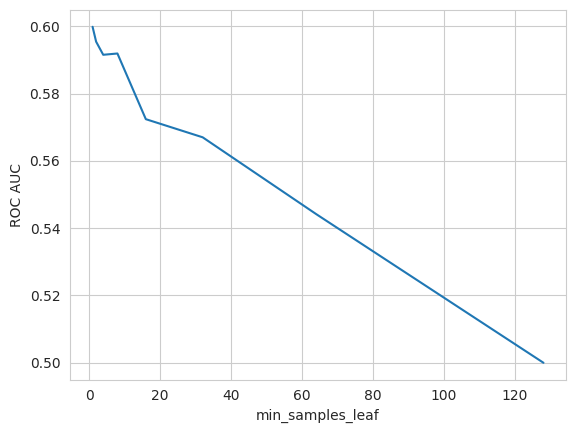

In [ ]:
fig,ax=plt.subplots(1,1)
plt.plot(dt_cv.cv_results_['param_min_samples_leaf'].data, dt_cv.cv_results_['mean_test_score'])
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('ROC AUC')

# Multiclass classification

Let's have a look how multiclass tasks are treated.

In [ ]:
# !pip install --force-reinstall -v "scikit-learn==1.3.2"

In [ ]:
# import some modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import zipfile
import pandas as pd
import numpy as np

## Load data

We will use data from Kaggle contest *"Otto Group
Product Classification Challenge"*, which was created to predict class of an item by several features.

https://www.kaggle.com/c/otto-group-product-classification-challenge

Data are in ZIP, but we can load them easily

In [ ]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/otto/train.csv', index_col='id')
test_dataset = pd.read_csv('https://raw.githubusercontent.com/adasegroup/ML2025_seminars/main/Seminar_03/otto/test.cutted.csv', index_col='id')

Data consist of the following:
* **id** -- anonymized identifier;
* **feat_1, ..., feat_93** -- features;
* **target** -- actual class of an item.

Let's see data description

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61878 entries, 1 to 61878
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feat_1   61878 non-null  int64 
 1   feat_2   61878 non-null  int64 
 2   feat_3   61878 non-null  int64 
 3   feat_4   61878 non-null  int64 
 4   feat_5   61878 non-null  int64 
 5   feat_6   61878 non-null  int64 
 6   feat_7   61878 non-null  int64 
 7   feat_8   61878 non-null  int64 
 8   feat_9   61878 non-null  int64 
 9   feat_10  61878 non-null  int64 
 10  feat_11  61878 non-null  int64 
 11  feat_12  61878 non-null  int64 
 12  feat_13  61878 non-null  int64 
 13  feat_14  61878 non-null  int64 
 14  feat_15  61878 non-null  int64 
 15  feat_16  61878 non-null  int64 
 16  feat_17  61878 non-null  int64 
 17  feat_18  61878 non-null  int64 
 18  feat_19  61878 non-null  int64 
 19  feat_20  61878 non-null  int64 
 20  feat_21  61878 non-null  int64 
 21  feat_22  61878 non-null  int64 
 22  fea

In [ ]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
feat_1,61878.0,0.386680,1.525330,0.0,0.0,0.0,0.0,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.0,0.0,0.0,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.0,0.0,0.0,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.0,0.0,0.0,70.0
feat_5,61878.0,0.071043,0.438902,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...
feat_89,61878.0,0.457772,1.527385,0.0,0.0,0.0,0.0,61.0
feat_90,61878.0,0.812421,4.597804,0.0,0.0,0.0,0.0,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.0,0.0,0.0,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.0,0.0,0.0,19.0


Number of objects for every class in **target**

In [ ]:
train_dataset['target'].value_counts().reset_index()

,target,count
0,Class_2,16122
1,Class_6,14135
2,Class_8,8464
3,Class_3,8004
4,Class_9,4955
5,Class_7,2839
6,Class_5,2739
7,Class_4,2691
8,Class_1,1929


Divide data into input and output, transform labels from strings to numbers. We will do it manually, but there is the other option: **LabelEncoder** allows us to perform that transform and obtain numbers from $0$ to $K-1$, where $K$ is the number of classes.

In [ ]:
y = train_dataset["target"]
X = np.asarray(train_dataset.drop("target", axis = 1))

In [ ]:
for i in range(1, 10):
    y.replace('Class_%d' % i, i - 1, inplace = True)

/tmp/ipython-input-2332658498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('Class_%d' % i, i - 1, inplace = True)


Now let's start fitting classification models

In [ ]:
! pip install xgboost
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier(objective='multi:softprob')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Split data into training sample and test sample

In [ ]:
split = train_test_split(X, y, test_size=0.5,
                         random_state=42, stratify=y)
train_X, test_X, train_y, test_y = split

In [ ]:
xgb.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
test_preds = xgb.predict(test_X)

In [ ]:
accuracy_score(test_y, test_preds)

0.8073305536701251

Below is two quite rich quality reports for multiclass classification:

- **confusin_matrix**

- **classification_report** ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)):
    - shows `precision`, `recall`, `F1 score` for each class (treating it as Positive, everything else - as Negative)
    - shows averaged : `accuracy` + *weighted* (a.k.a. *micro*) / *macro* (unweighted) statistics

In [ ]:
confusion_matrix(test_y, test_preds)

array([[ 465,   24,   11,    0,    4,   90,   35,  140,  195],
       [   7, 6869,  953,  104,   12,   11,   70,   19,   16],
       [   2, 1812, 2022,   71,    0,    5,   73,   10,    7],
       [   1,  430,  199,  649,    8,   35,   17,    4,    2],
       [   3,   25,    1,    1, 1331,    1,    2,    1,    5],
       [  35,   58,   13,    8,    0, 6642,   94,  108,  110],
       [  34,  140,  101,   15,    5,  107,  934,   66,   18],
       [  64,   36,   15,    0,    3,  104,   44, 3901,   65],
       [  91,   41,    2,    0,    1,   85,    9,   83, 2165]])

In [ ]:
print(classification_report(test_y, test_preds))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56       964
           1       0.73      0.85      0.79      8061
           2       0.61      0.51      0.55      4002
           3       0.77      0.48      0.59      1345
           4       0.98      0.97      0.97      1370
           5       0.94      0.94      0.94      7068
           6       0.73      0.66      0.69      1420
           7       0.90      0.92      0.91      4232
           8       0.84      0.87      0.86      2477

    accuracy                           0.81     30939
   macro avg       0.79      0.74      0.76     30939
weighted avg       0.80      0.81      0.80     30939

